In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lif import *

# Experiment example

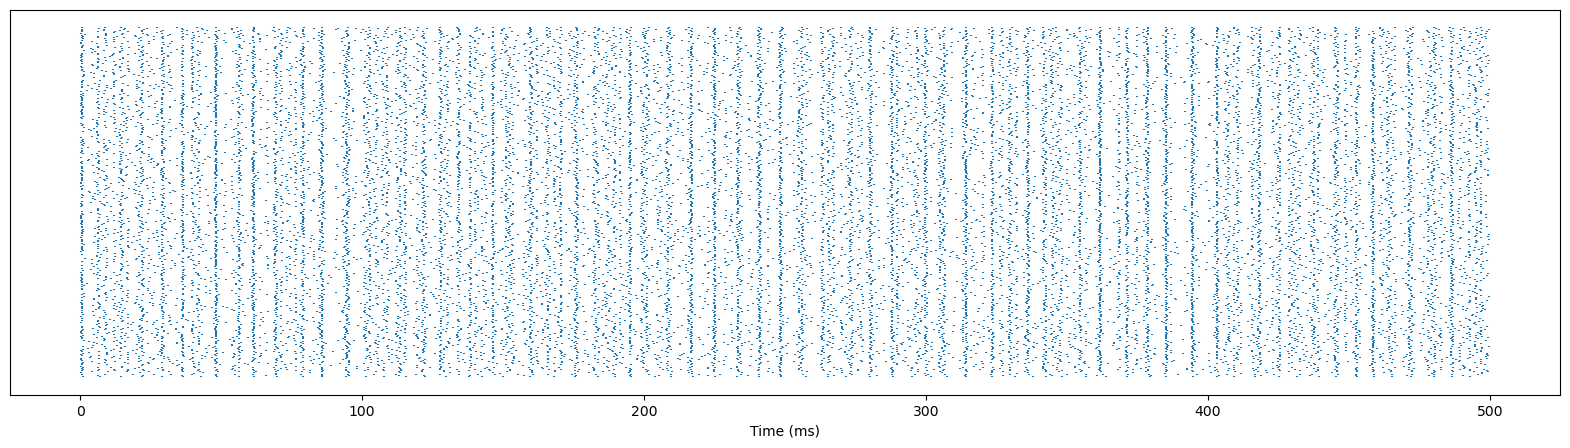

In [12]:
exp = Experiment(1000, .1, .45, 120, -120)
_, _, spike_timestamps = exp.run(500, .1)

fig, ax = plt.subplots(figsize=(20,5))

# Iterate over each neuron
for i, neuron_spikes in enumerate(spike_timestamps):
    # Plot a vertical line for each spike time
    ax.vlines(neuron_spikes, i + 0.5, i + 1.5)

plt.tick_params(
    axis='y',          
    which='both',      
    right=False,      
    left=False,         
    labelleft=False)

plt.xticks(range(0, 5001, 1000), np.array(range(0, 501, 100)))
ax.set_xlabel('Time (ms)')

plt.show()

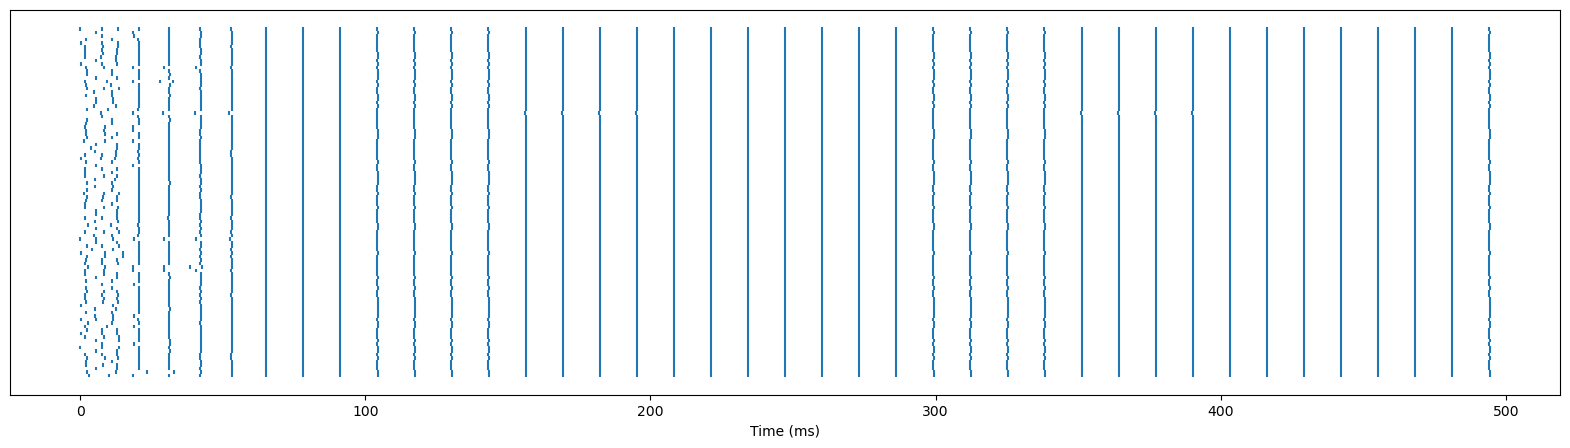

In [49]:
exp = Experiment(100, .5, .4, 120, -120)
_, _, spike_timestamps = exp.run(500, .1)

fig, ax = plt.subplots(figsize=(20,5))

# Iterate over each neuron
for i, neuron_spikes in enumerate(spike_timestamps):
    # Plot a vertical line for each spike time
    ax.vlines(neuron_spikes, i + 0.5, i + 1.5)

plt.tick_params(
    axis='y',          
    which='both',      
    right=False,      
    left=False,         
    labelleft=False)

plt.xticks(range(0, 5001, 1000), np.array(range(0, 501, 100)))
ax.set_xlabel('Time (ms)')

plt.show()

# Adding Noise

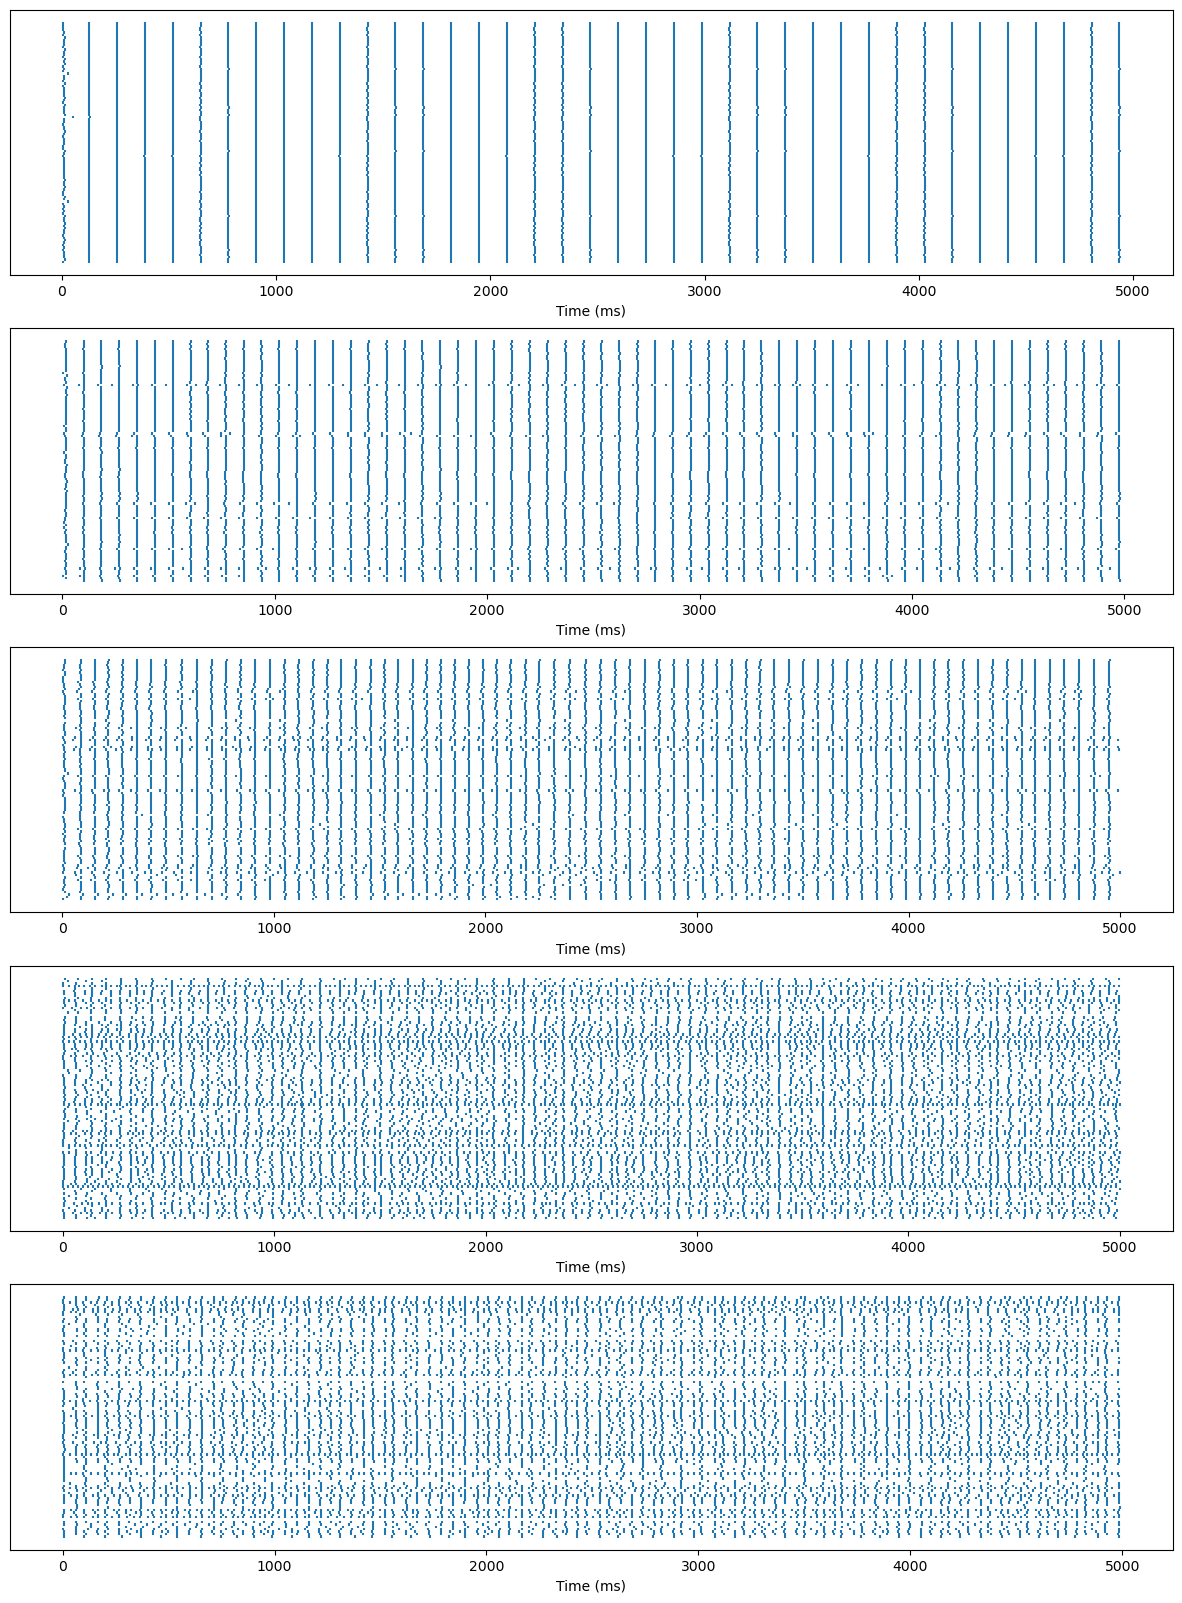

In [9]:
noises = [0, .2, .3, .4, .6]
fig, axs = plt.subplots(len(noises), 1, figsize=(15, 20))


for i in range(len(noises)):
    exp = Experiment(100, .3, .2, 120, -120, noises[i])
    _, _, spike_timestamps = exp.run(500, .1)

    # Iterate over each neuron
    for j, neuron_spikes in enumerate(spike_timestamps):
        # Plot a vertical line for each spike time
        axs[i].vlines(neuron_spikes, j + 0.5, j + 1.5)

        axs[i].tick_params(
            axis='y',          
            which='both',      
            right=False,      
            left=False,         
            labelleft=False)

        axs[i].set_xlabel('Time (ms)')

plt.show()

# Density/Inhibition balance

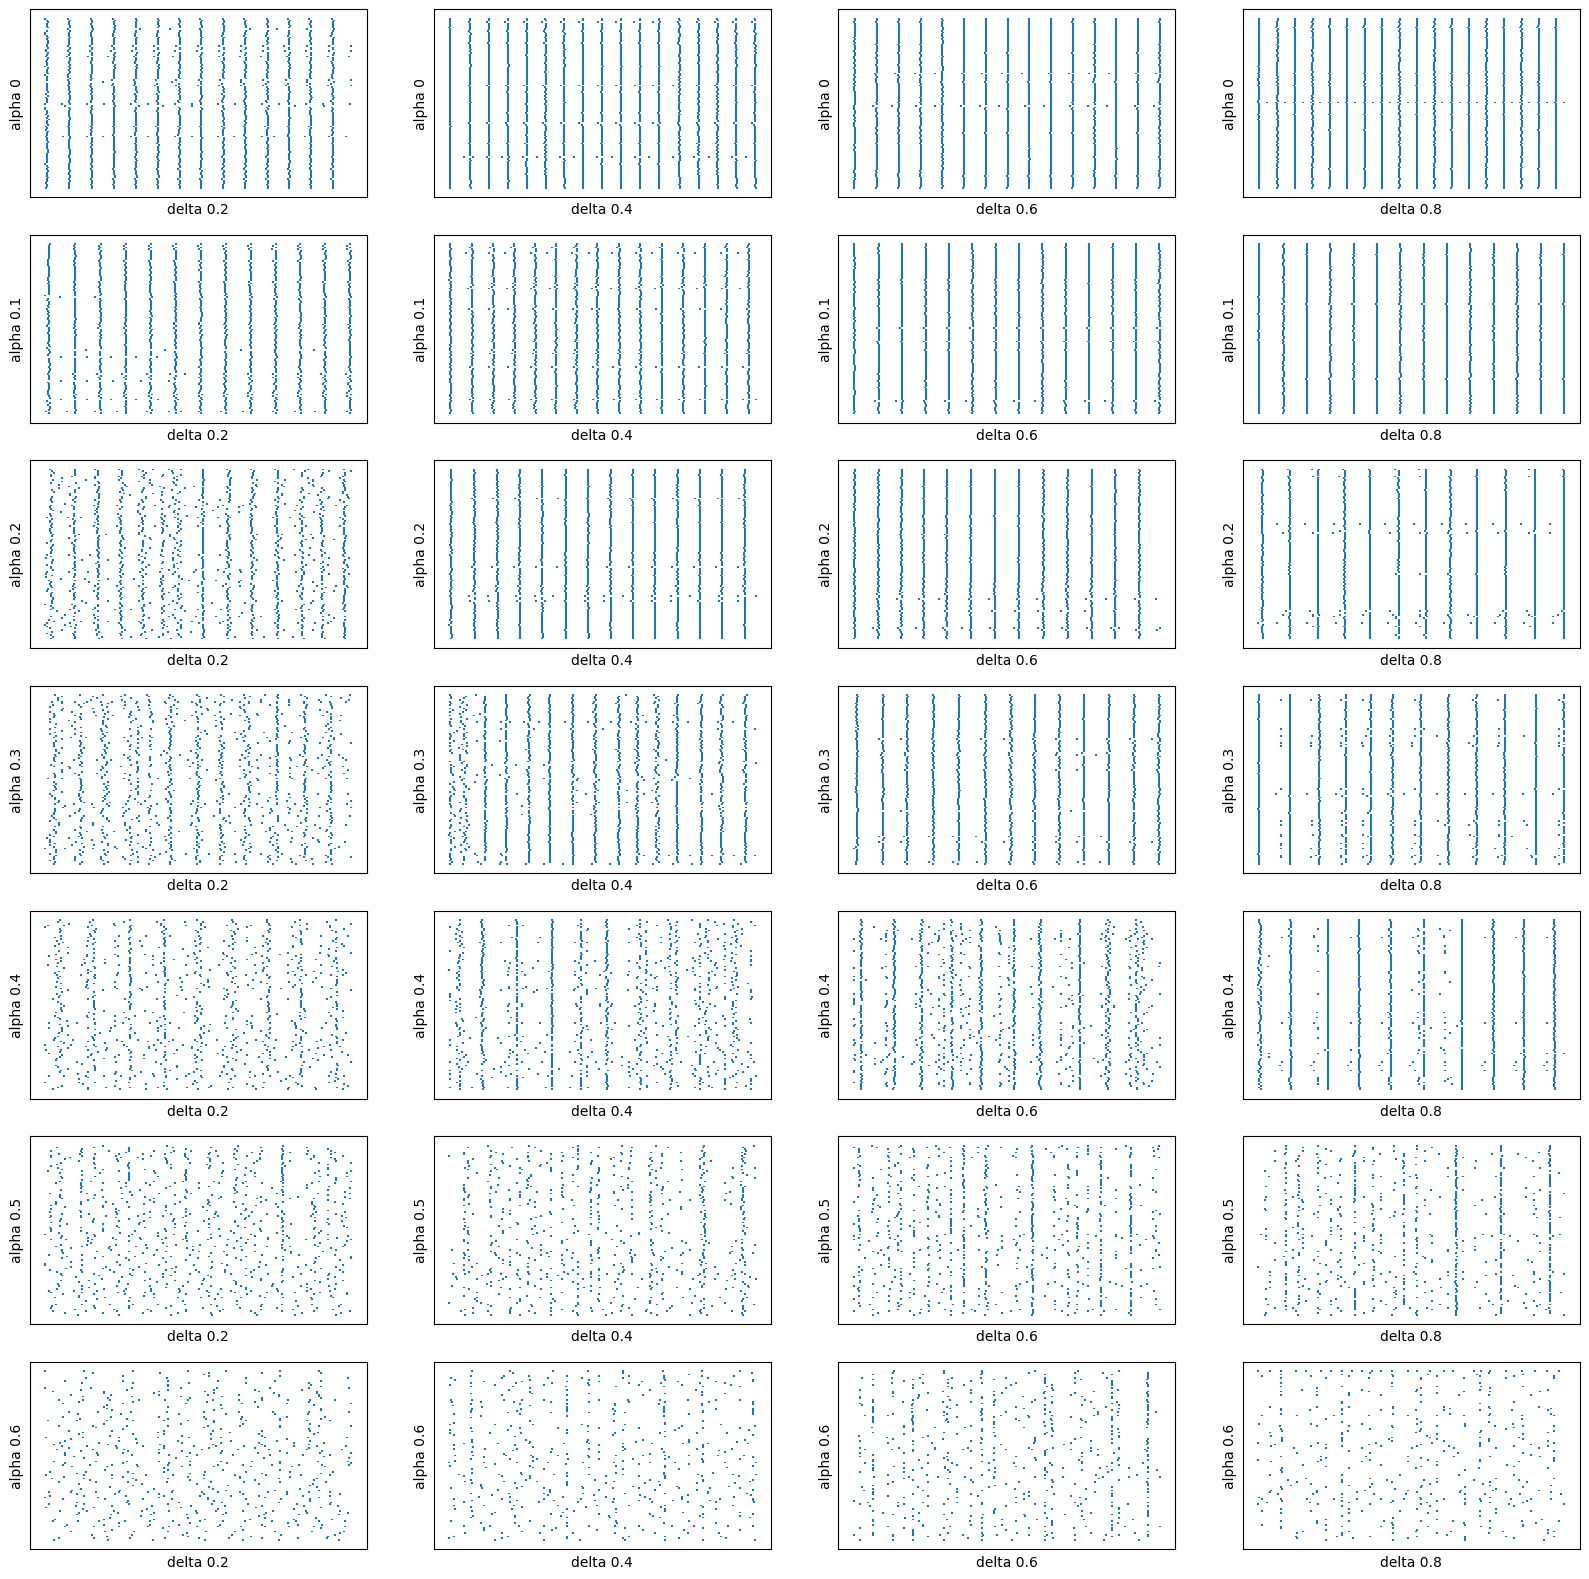

In [17]:
inhib_rates = [0, .1, .2, .3, .4, .5, .6]
densities = [.2, .4, .6, .8]
fig, axs = plt.subplots(len(inhib_rates), len(densities), figsize=(20, 20))

for i in range(len(inhib_rates)):
    for j in range(len(densities)):
        exp = Experiment(100, densities[j], inhib_rates[i], 120, -120, noise=.2)
        _, _, spike_timestamps = exp.run(100, .1)

        for t, neuron_spikes in enumerate(spike_timestamps):
            # Plot a vertical line for each spike time
            axs[i][j].vlines(neuron_spikes, t + 0.5, t + 1.5)

        axs[i][j].tick_params(
            axis='y',          
            which='both',   
            right=False,    
            left=False,     
            labelleft=False)
        
        axs[i][j].tick_params(
            axis='x',          
            which='both',      
            top=False,      
            bottom=False,     
            labelbottom=False)
        
        axs[i][j].set_xlabel('delta ' + str(densities[j]))
        axs[i][j].set_ylabel('alpha ' + str(inhib_rates[i]))